In [270]:
from scipy.spatial import distance

#find the distance
x=[1,2,3]
y=[4,5,6]
print("Minhattan distance = ",distance.minkowski(x,y,p=1))
print("Euclidean distance = ",distance.minkowski(x,y,p=2))
print("Minkowski distance = ",distance.minkowski(x,y,p=3))

Minhattan distance =  9.0
Euclidean distance =  5.196152422706632
Minkowski distance =  4.3267487109222245


In [271]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix #For classification
from sklearn.metrics import mean_squared_error,r2_score #For regression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

#Remove the warnings
import warnings
warnings.filterwarnings("ignore")


# Classification using KNN

In [272]:
#Exaple of KNN calssfier on iris data set
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# EDA

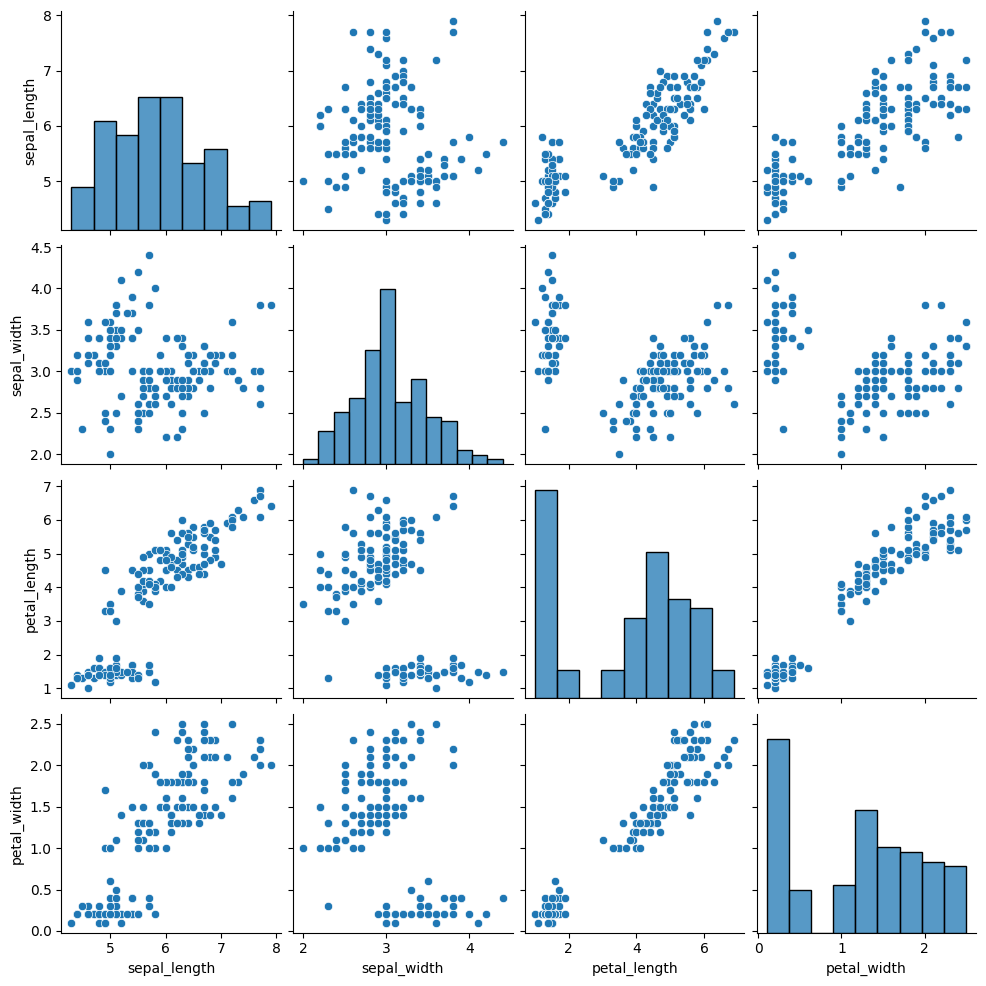

In [273]:
sns.pairplot(data=df)
plt.show()

# Data Cleaning

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [275]:
df.duplicated().sum()

1

In [276]:
df=df.drop_duplicates()

In [277]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Build Model

In [278]:
#Seperate the feature and target value
X=df.drop('species',axis=1)
Y=df['species']

#load and fit KNN on the data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,Y)

KNeighborsClassifier()

In [279]:
#predict the species for new measurement
new_measurement=np.array([[6.7,3.0,5.2,2.3]])
new_measurement2=np.array([[4.9,	3.1,	1.5,	0.1]])
#knn.predict(new_measurement)
knn.predict(new_measurement2)

array(['setosa'], dtype=object)

In [280]:
#Trian test split the data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

#Build the model
model=KNeighborsClassifier(n_neighbors=5)
#train the model
model.fit(X_train,Y_train)

#Predict the model
Y_pred=model.predict(X_test)

#Evalaute the model]

print('classificatin report = \n ',classification_report(Y_test,Y_pred))



classificatin report = 
                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



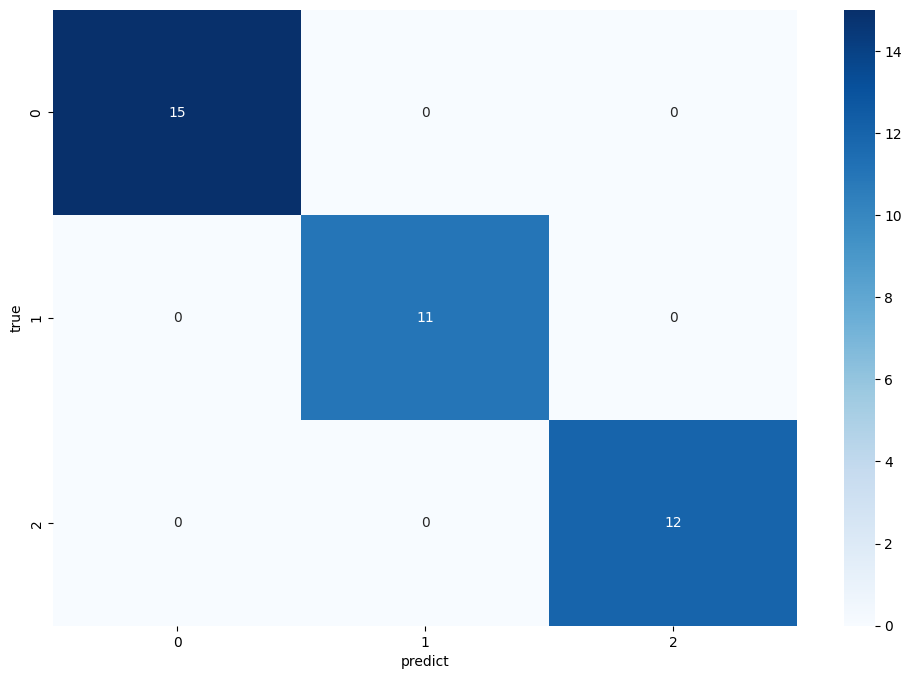

In [281]:
#Draw the confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap="Blues")
plt.xlabel("predict")
plt.ylabel("true")
plt.show()

# Regression using KNN

In [282]:
#using the tips dataset to regression
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# EDA

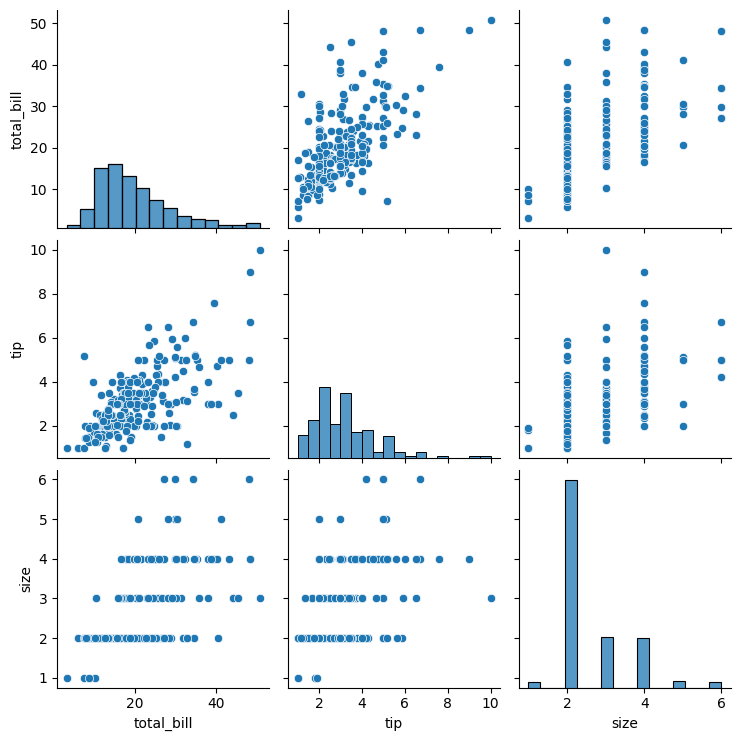

In [283]:
sns.pairplot(data=data)
plt.show()

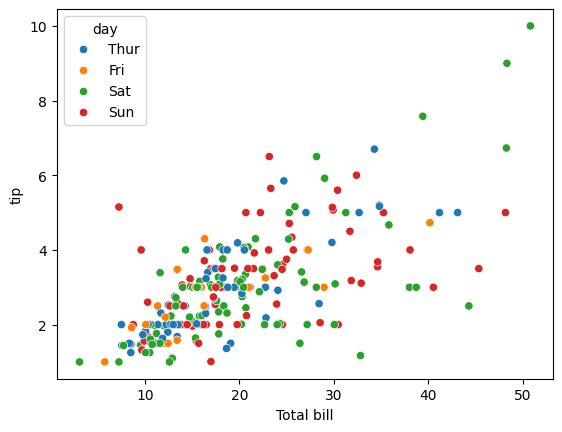

In [284]:
sns.scatterplot(data=data,x="total_bill",y="tip",hue="day")
plt.xlabel("Total bill")
plt.ylabel("tip")
plt.show()


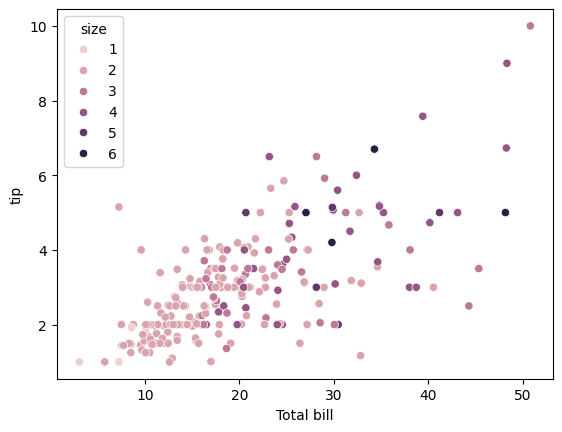

In [285]:
sns.scatterplot(data=data,x="total_bill",y="tip",hue="size")
plt.xlabel("Total bill")
plt.ylabel("tip")
plt.show()

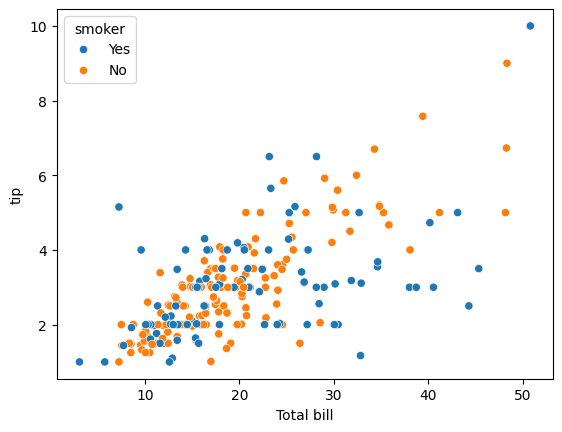

In [286]:
sns.scatterplot(data=data,x="total_bill",y="tip",hue="smoker")
plt.xlabel("Total bill")
plt.ylabel("tip")
plt.show()

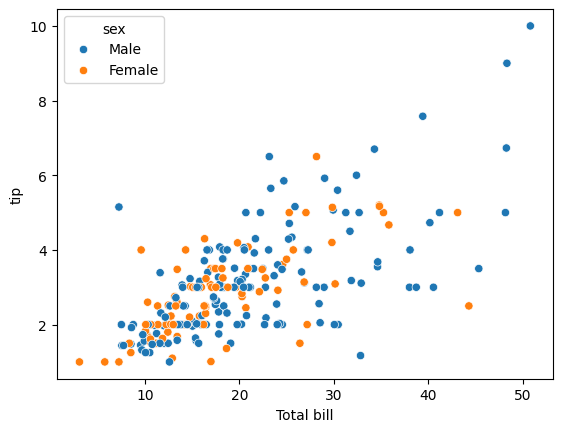

In [287]:
sns.scatterplot(data=data,x="total_bill",y="tip",hue="sex")
plt.xlabel("Total bill")
plt.ylabel("tip")
plt.show()

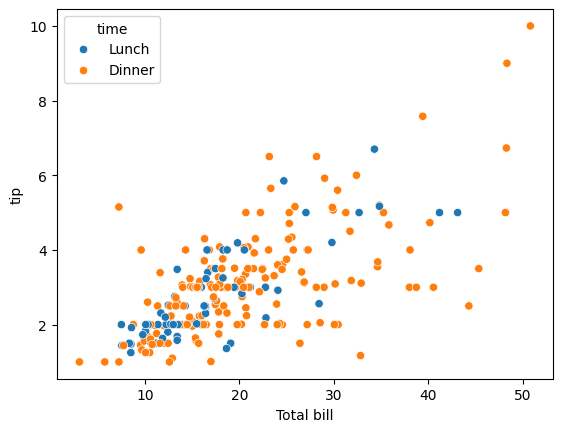

In [288]:
sns.scatterplot(data=data,x="total_bill",y="tip",hue="time")
plt.xlabel("Total bill")
plt.ylabel("tip")
plt.show()

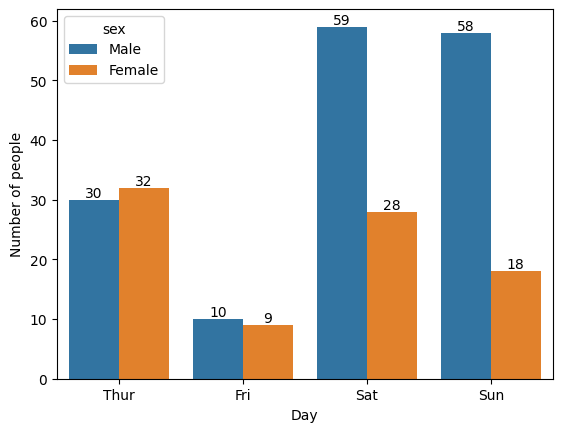

sex
Male      157
Female     87
Name: count, dtype: int64


In [289]:
ax=sns.countplot(data=data,x="day",hue="sex")
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Day")
plt.ylabel("Number of people")
plt.show()

print(data["sex"].value_counts())

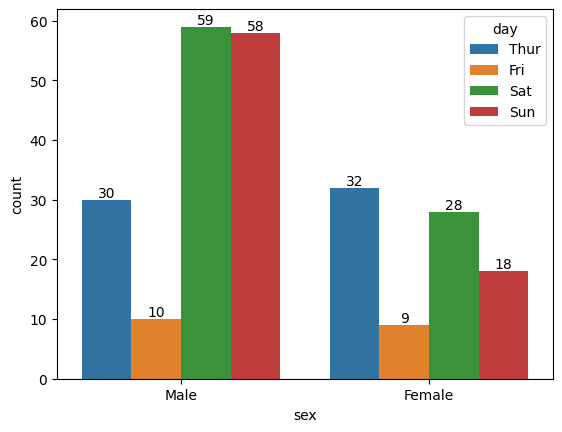

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


In [290]:
ax=sns.countplot(data=data,x="sex",hue="day")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

print(data["day"].value_counts())

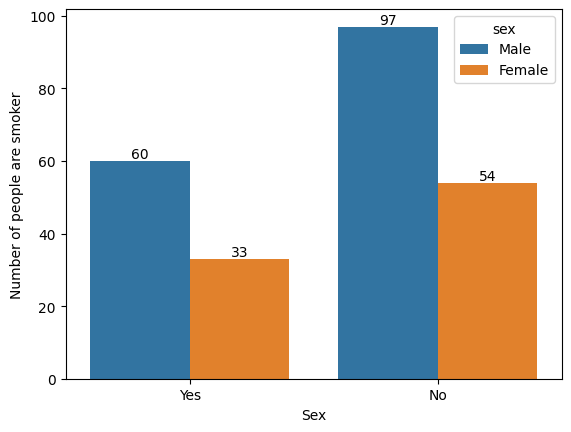

smoker
No     151
Yes     93
Name: count, dtype: int64


In [291]:
ax=sns.countplot(data=data,x="smoker",hue="sex")
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Sex")
plt.ylabel("Number of people are smoker")
plt.show()

print(data["smoker"].value_counts())

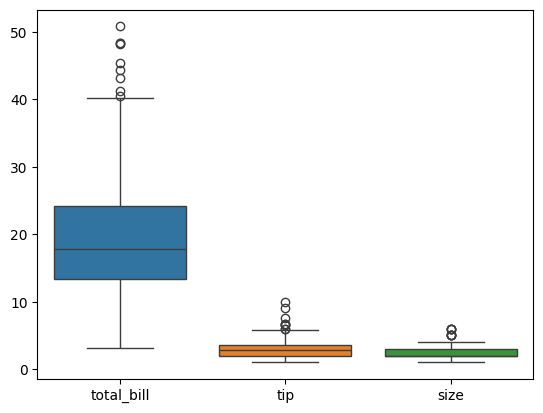

In [292]:
#
sns.boxplot(data=data)
plt.show()

In [293]:
data.sample()

,total_bill,tip,sex,smoker,day,time,size
195,7.56,1.44,Male,No,Thur,Lunch,2


# Data Cleaning

In [294]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [295]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [296]:
data.duplicated().sum()

1

In [297]:
data=data.drop_duplicates()

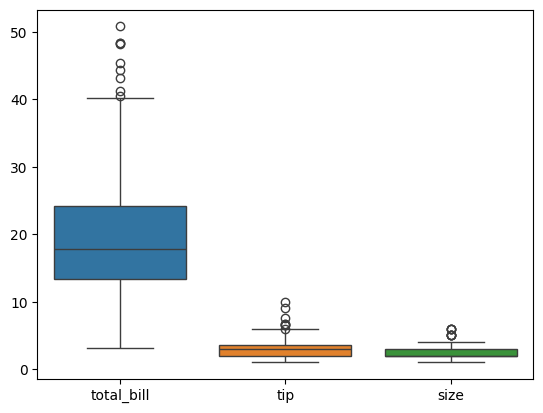

In [299]:
sns.boxplot(data=data)
plt.show()

In [300]:
lb=LabelEncoder()

data["sex"]=lb.fit_transform(data["sex"])
data["smoker"]=lb.fit_transform(data["smoker"])
data["day"]=lb.fit_transform(data["day"])
data["time"]=lb.fit_transform(data["time"])

In [301]:
data["total_bill"]=StandardScaler().fit_transform(data[["total_bill"]])
data["tip"]=StandardScaler().fit_transform(data[["tip"]])

# Build Model

In [323]:
X=data.drop('tip',axis=1)

Y=data['tip']


#trian test and split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#build the  model
model=KNeighborsRegressor(n_neighbors=4,metric ='minkowski',p=2) #this is automatic take this distance (euclidean)

#train the model
model.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=4)

In [324]:
#predict the model
Y_pred=model.predict(X_test)

#Evaluate the model
print(f"MSE : {mean_squared_error(Y_test,Y_pred)}")
print(f"r2 score : {r2_score(Y_test,Y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")

MSE : 0.7177760927561813
r2 score : 0.43722222645300834
RMSE : 0.8472166740310186


# Predication

In [269]:
#predict the specific value
model.predict([[24.59,0,0,2,0,4]])

array([1.69562953])

In [325]:
# You can use other method to improve the score